# 1 Non-negative matrix factorization

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn import decomposition
import pandas as pd
digits = load_digits()
X = digits["data"]/16.
Y = digits["target"]

## 1.1 Comparison of scikit-learn’s NMF with SVD

In [2]:
comp_no = 10
model = decomposition.NMF(n_components=comp_no, init='random', tol=3e-3) # tol needed not to see warning
Z = model.fit_transform(X)
H = model.components_
X_centered = X - np.mean(X, axis=0)
u, s, vh = np.linalg.svd(X_centered)
vh = vh + np.mean(X, axis=0)

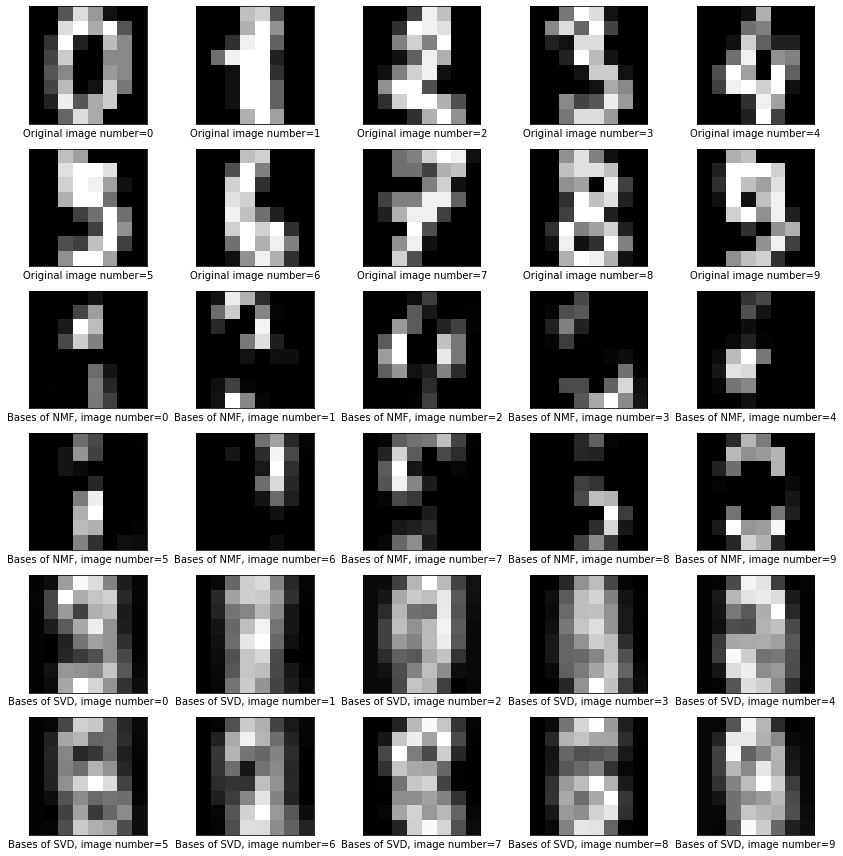

In [3]:
# This cell is taken from the sample solution of the ex07 plotting part and modified for this task.
plt.figure(figsize=(12,12))
# Simplify the plots later on:
plot_number = 1
def add_sublot():
    global plot_number
    plt.subplot(6,5,plot_number)
    plot_number += 1

for org_idx in range(comp_no):
    add_sublot()
    plt.imshow(X[org_idx].reshape((8, 8)),
            cmap='gray', 
            interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Original image number=%.0f' % (org_idx))


for nmf_idx in range(comp_no):
    add_sublot()
    plt.imshow(H[nmf_idx].reshape((8, 8)),
            cmap='gray',
            interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Bases of NMF, image number=%.0f' % (nmf_idx))
    
for svd_idx in range(comp_no):
    add_sublot()
    plt.imshow(vh[svd_idx].reshape((8, 8)),
            cmap='gray',
            interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Bases of SVD, image number=%.0f' % (svd_idx))

plt.tight_layout()

NMF bases are sparse comparing to the SVD bases. By just looking at the results, it is hard to say more. 

## 1.2 Implementation

In [4]:
def non_negative(X, num_components, num_iter=1000):
    Z0 = np.abs(np.random.randn(X.shape[0], num_components)) # said in prev. section Z is NxM matrix
    H0 = np.abs(np.random.randn(num_components, X.shape[1])) # H is MxD matrix
    H_t = H0
    Z_t = Z0
    for t in range(num_iter):
        H_t1 = H_t * (Z_t.T @ X) / (np.clip(Z_t.T @ Z_t @ H_t, 1e-4, 1e+6))
        Z_t1 = Z_t * (X @ H_t1.T) / (np.clip(Z_t @ H_t1 @ H_t1.T, 1e-4, 1e+6))
        H_t = H_t1
        Z_t = Z_t1
        
        if t > 1 and np.linalg.norm(X - Z_t @ H_t) > check_inc:
            print('Increase')
        elif t == 999:
            print('All non-increase')
        check_inc = np.linalg.norm(X - Z_t @ H_t) # confirm square-loss non-increases
    return Z_t, H_t

In [5]:
Z_imp, H_imp = non_negative(X, num_components=10, num_iter=1000)

All non-increase


In [6]:
X_new = Z_imp @ H_imp

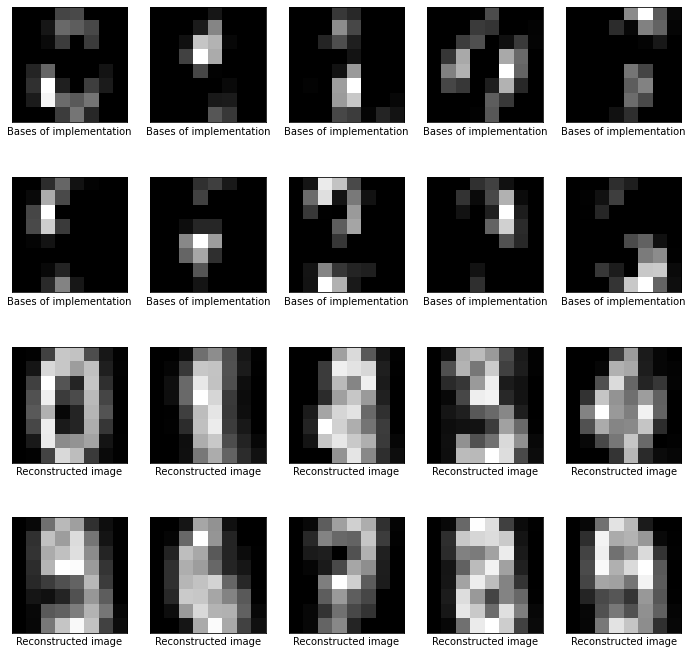

In [7]:
plt.figure(figsize=(12,12))

plot_number = 1
def add_sublot():
    global plot_number
    plt.subplot(4,5,plot_number)
    plot_number += 1

for org_idx in range(comp_no):
    add_sublot()
    plt.imshow(H_imp[org_idx].reshape((8, 8)),
            cmap='gray', 
            interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Bases of implementation')

for nmf_idx in range(comp_no):
    add_sublot()
    plt.imshow(X_new[nmf_idx].reshape((8, 8)),
            cmap='gray',
            interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Reconstructed image')

Since both the scikit-learn and implementation version use random data we could not compare the two methods. Non-increasement of the squared loss is confirmed.

# 2 Recommender system

In [8]:
#column headers for the dataset
ratings_cols = ['user id','movie id','rating','timestamp']
movies_cols = ['movie id','movie title','release date', 'video release date','IMDb URL','unknown','Action', 'Adventure','Animation','Childrens','Comedy','Crime', 'Documentary','Drama','Fantasy','Film-Noir','Horror', 'Musical','Mystery','Romance','Sci-Fi','Thriller', 'War' ,'Western']
users_cols = ['user id','age','gender','occupation', 'zip code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=users_cols, encoding='latin-1')
movies = pd.read_csv('ml-100k/u.item', sep='|', names=movies_cols, encoding='latin-1')
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=ratings_cols, encoding='latin-1') # peek at the dataframes, if you like :)
users.head(); movies.head(); ratings.head() # create a joint ratings dataframe for the matrix
fill_value = 0 
rat_df = ratings.pivot(index = 'user id', columns ='movie id', values = 'rating').fillna(fill_value)
rat_df.head()

movie id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
def recommend_movies(pred, user_id, movies, ratings, top_num=10):
    user_sorted_data = ratings[ratings["user id"] == (user_id)].sort_values(['rating'], ascending=False)
    pred_sorted = (pred.iloc[user_id-1].sort_values(ascending=False))
    movies_filt = []
    for idx in range(user_sorted_data.shape[0]):
        movies_filt.append(user_sorted_data.iloc[idx, 1])
    reco = movies.iloc[movies_filt, :]
    recom = movies.iloc[(pred_sorted.drop(movies_filt)).reset_index().iloc[:top_num, 0]]
    return reco, recom

In [10]:
data_matrix = rat_df.values
Z_netf, H_netf = non_negative(data_matrix, num_components=20)

reconstruction = pd.DataFrame(Z_netf @ H_netf, columns = rat_df.columns)
seen_movies, predictions = recommend_movies(reconstruction, 1, movies, ratings, 20)

All non-increase


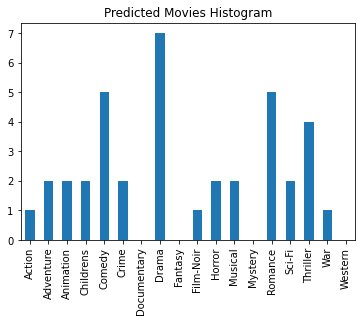

In [11]:
predictions = predictions.drop(columns=["movie id", "movie title", "release date", "video release date", "IMDb URL", "unknown"])
predictions.sum().plot(kind='bar', title="Predicted Movies Histogram")
plt.show()

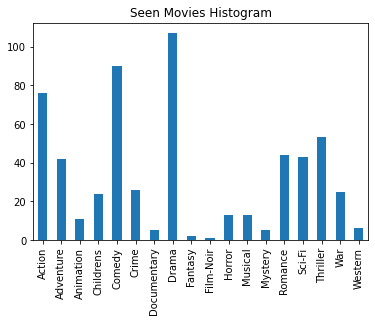

In [12]:
seen_movies = seen_movies.drop(columns=["movie id", "movie title", "release date", "video release date", "IMDb URL", "unknown"])
seen_movies.sum().plot(kind='bar', title="Seen Movies Histogram")
plt.show()

The difference caused by the number of the movies that the user have seen and predicted movies only contains 20 movies. However, predicted and seen movies histogram result similar.